In [1]:
import requests
import os
def get_qts(sym):
    #print(os.environ)
    api_key=os.environ['alphavantage_key']
    p = {"http":"http://127.0.0.1:8118", "https": "http://127.0.0.1:8118",}
    url="https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&outputsize=full&apikey={}".format(sym, api_key)
    r = requests.get(url, proxies=p)
    d=r.json()
    return d
    
intel=get_qts("INTC")
amd=get_qts("AMD")

In [2]:
int_ts=intel['Time Series (Daily)']
amd_ts=amd['Time Series (Daily)']

keys_list_amd=[]
keys_list_intl=[]

for key in int_ts.keys(): keys_list_intl.append(key)
for key in amd_ts.keys(): keys_list_amd.append(key)
print(len(keys_list_amd), len(keys_list_intl), keys_list_amd==keys_list_intl)
arr=[]
for key in keys_list_amd:
    rec= [key, int_ts[key]['4. close'], amd_ts[key]['4. close']]
    arr.append(rec)

5216 5216 True


In [3]:
import pandas as pd

df=pd.DataFrame(arr)
df.columns=['dt','int','amd']
df=df.astype({'dt':str, "int": float, "amd": float})
init_st=df.iloc[0]

int_q=1000/init_st['int']
amd_q=1000/init_st['amd']


df['int_m']=df['int']*int_q
df['amd_m']=df['amd']*amd_q
df['diff_w']=df['int_m']-df['amd_m']

df.head()

,dt,int,amd,int_m,amd_m,diff_w
0,2020-07-24,50.59,69.40,1000.000000,1000.000000,0.000000
1,2020-07-23,60.40,59.57,1193.911840,858.357349,335.554492
2,2020-07-22,61.05,61.79,1206.760229,890.345821,316.414408
3,2020-07-21,60.70,57.00,1199.841866,821.325648,378.516218
4,2020-07-20,61.15,57.46,1208.736905,827.953890,380.783014


In [4]:
df.tail()

,dt,int,amd,int_m,amd_m,diff_w
5211,1999-11-05,82.38,21.25,1628.385056,306.195965,1322.189091
5212,1999-11-04,81.56,20.63,1612.176319,297.262248,1314.914072
5213,1999-11-03,79.75,21.31,1576.398498,307.060519,1269.337979
5214,1999-11-02,77.50,20.56,1531.923305,296.253602,1235.669703
5215,1999-11-01,76.00,20.31,1502.273177,292.651297,1209.621880


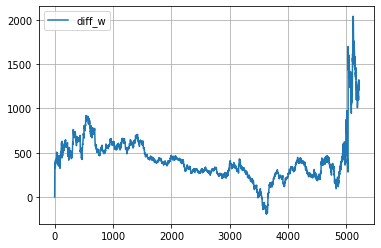

In [5]:
df[['diff_w']].plot(grid=True)

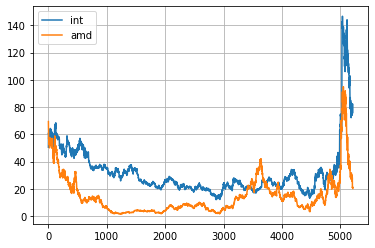

In [6]:
df[['int','amd']].plot(grid=True)